In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dask import dataframe as dd
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

In [3]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\imbalanced_row_cleaned_data.csv"
df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

In [4]:
df.nunique()

Protocol                         3
Flow Duration               152865
Total Fwd Packets              364
Total Backward Packets         127
Fwd Packets Length Total      2613
                             ...  
Idle Mean                    70418
Idle Std                     58641
Idle Max                     70399
Idle Min                     70264
Label                           11
Length: 78, dtype: int64

#### Dropping categorical columns that have one category predominance

In [5]:
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Performing drop operation & saving that in new csv

In [6]:
df.drop(columns=unique_value_columns, inplace=True)
df.shape

(434813, 66)

In [7]:
def dataCleaningResultToAnotherCSV(dataFrameArg, dirPath, file_name):
    dataFrameArg.to_csv(dirPath + file_name)

newCsvPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "after_dropping_unique_data_containing_features.csv"
dataCleaningResultToAnotherCSV(dataFrameArg=df, dirPath=newCsvPath, file_name=csvFileName)

#### As we visualized the heatmap of the remaining 66 features, now need to find out the co-relation pairs
#### But Before that, need to apply encoding of categorical data, such as "Label" feature

In [8]:
le = preprocessing.LabelEncoder()
before_encoding_dataframe = df.copy(deep=True)
before_encoding_dataframe.head(5) # see the Label feature

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
2382        17            749                146                       0   
386         17         218016                  6                       0   
2311        17         220115                  6                       0   
1455        17          20587                  2                       2   
1612        17         212090                  6                       0   

      Fwd Packets Length Total  Bwd Packets Length Total  \
2382                   63808.0                       0.0   
386                     2094.0                       0.0   
2311                    2088.0                       0.0   
1455                      90.0                     172.0   
1612                    2088.0                       0.0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
2382                  440.0                  224.0                437.0411   
386                   394.0                  322.0                349.0000   
2311                  393.0                  321.0                348.0000   
1455                   45.0                   45.0                 45.0000   
1612                  393.0                  321.0                348.0000   

      Fwd Packet Length Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
2382              25.193562  ...                 0          0.0         0.0   
386               35.088459  ...                20          0.0         0.0   
2311              35.088459  ...                 0          0.0         0.0   
1455               0.000000  ...                32          0.0         0.0   
1612              35.088459  ...                 0          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
2382         0.0         0.0        0.0       0.0       0.0       0.0   
386          0.0         0.0        0.0       0.0       0.0       0.0   
2311         0.0         0.0        0.0       0.0       0.0       0.0   
1455         0.0         0.0        0.0       0.0       0.0       0.0   
1612         0.0         0.0        0.0       0.0       0.0       0.0   

           Label  
2382   DrDoS_NTP  
386   DrDoS_SSDP  
2311  DrDoS_SSDP  
1455      BENIGN  
1612  DrDoS_SSDP  

[5 rows x 66 columns]

In [10]:
df["Label"] = le.fit_transform(df["Label"])
df["Label"] = pd.to_numeric(df['Label'], downcast='integer')
df.head(5) # see the Label feature

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
2382        17            749                146                       0   
386         17         218016                  6                       0   
2311        17         220115                  6                       0   
1455        17          20587                  2                       2   
1612        17         212090                  6                       0   

      Fwd Packets Length Total  Bwd Packets Length Total  \
2382                   63808.0                       0.0   
386                     2094.0                       0.0   
2311                    2088.0                       0.0   
1455                      90.0                     172.0   
1612                    2088.0                       0.0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
2382                  440.0                  224.0                437.0411   
386                   394.0                  322.0                349.0000   
2311                  393.0                  321.0                348.0000   
1455                   45.0                   45.0                 45.0000   
1612                  393.0                  321.0                348.0000   

      Fwd Packet Length Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
2382              25.193562  ...                 0          0.0         0.0   
386               35.088459  ...                20          0.0         0.0   
2311              35.088459  ...                 0          0.0         0.0   
1455               0.000000  ...                32          0.0         0.0   
1612              35.088459  ...                 0          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
2382         0.0         0.0        0.0       0.0       0.0       0.0      4  
386          0.0         0.0        0.0       0.0       0.0       0.0      6  
2311         0.0         0.0        0.0       0.0       0.0       0.0      6  
1455         0.0         0.0        0.0       0.0       0.0       0.0      0  
1612         0.0         0.0        0.0       0.0       0.0       0.0      6  

[5 rows x 66 columns]

<center><h3 style="background:#FF00FF;color:black">
Encoding of "Label" visualization
</h3></center>

In [11]:
Label_keys = list(before_encoding_dataframe.Label)
Label_values = list(df.Label)
# Label_tuples = list(zip(Label_keys,Label_values)) # # creating tuples from above two lists
# Label_visualize_df = pd.DataFrame(Label_tuples, columns=['Label','Encoding'])
Label_dict = dict(Label = Label_keys,Encoding = Label_values)
Label_visualize_df = pd.DataFrame.from_dict(Label_dict)
Label_visualize_df.drop_duplicates(inplace=True)
Label_visualize_df.reset_index(inplace=True, drop=True)
Label_visualize_df

Label  Encoding
0     DrDoS_NTP         4
1    DrDoS_SSDP         6
2        BENIGN         0
3          TFTP         9
4   DrDoS_MSSQL         3
5    DrDoS_SNMP         5
6       UDP-lag        10
7    DrDoS_LDAP         2
8           Syn         8
9     DrDoS_DNS         1
10    DrDoS_UDP         7

<center><h4 style="background:#ADFF2F;color:black">
Saving the after encoding dataframe into new csv
</h4></center>

In [12]:
dirPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "After_Label_Encoding.csv"
encodingFileName = "Label_Encoding.csv"

Label_visualize_df.to_csv(dirPath+encodingFileName)
df.to_csv(dirPath + csvFileName)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434813 entries, 2382 to 1756
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  434813 non-null  int64  
 1   Flow Duration             434813 non-null  int64  
 2   Total Fwd Packets         434813 non-null  int64  
 3   Total Backward Packets    434813 non-null  int64  
 4   Fwd Packets Length Total  434813 non-null  float64
 5   Bwd Packets Length Total  434813 non-null  float64
 6   Fwd Packet Length Max     434813 non-null  float64
 7   Fwd Packet Length Min     434813 non-null  float64
 8   Fwd Packet Length Mean    434813 non-null  float64
 9   Fwd Packet Length Std     434813 non-null  float64
 10  Bwd Packet Length Max     434813 non-null  float64
 11  Bwd Packet Length Min     434813 non-null  float64
 12  Bwd Packet Length Mean    434813 non-null  float64
 13  Bwd Packet Length Std     434813 non-null  

<center><h3 style="background:orange;color:black">
Hypothesis Testing
</h3></center>

##### Null Hypothesis(H0): There exists no co-relation between two features
##### Alternative Hypothesis (H1): opposite of null hypothesis

<center><h3 style="background:yellow;color:black">
Chi-Squared Test
</h3></center>

In [13]:
from scipy.stats import chi2_contingency
def chi_squared_test(feature1,feature2):
    stat ,p, dof, expected = chi2_contingency(pd.crosstab(feature1,feature2))
    alpha = 0.05
    if p > alpha:
        return f"They are independent & P-value: {p}"
    else:
        return f"Co-related & P-value: {p}"

In [14]:
present_columns = sorted(df)
present_columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets Length Total',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packets Length Total',
 'Fwd Packets/s',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'P

##### Relation between Syn Flag count vs Protocol

In [15]:
pd.crosstab(df['SYN Flag Count'],df['Protocol'])

Protocol         0      6       17
SYN Flag Count                    
0               308  83054  351314
1                 0    137       0

In [16]:
chi_squared_test(df['SYN Flag Count'],df['Protocol'])

'Co-related & P-value: 1.6597577451103146e-126'

##### Relation between RST Flag count vs Protocol

In [17]:
pd.crosstab(df['RST Flag Count'],df['Protocol'])

Protocol         0      6       17
RST Flag Count                    
0               308  82371  351314
1                 0    820       0

In [18]:
chi_squared_test(df['RST Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between CWE Flag count vs Protocol

In [19]:
pd.crosstab(df['CWE Flag Count'],df['Protocol'])

Protocol         0      6       17
CWE Flag Count                    
0               308  81353  351314
1                 0   1838       0

In [20]:
chi_squared_test(df['CWE Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between URG Flag count vs Protocol

In [21]:
pd.crosstab(df['URG Flag Count'],df['Protocol'])

Protocol         0      6       17
URG Flag Count                    
0               308  79452  351314
1                 0   3739       0

In [22]:
chi_squared_test(df['URG Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

<center><h3 style="background:yellow;color:black">
T Test
</h3></center>

In [23]:
from scipy.stats import ttest_ind
def t_value_test(feature1,feature2):
    score = ttest_ind(feature1,feature2,equal_var=False)[1]
    if score > 0.05:
        return f"Co-related & T-score: {score}"
    return f"They are independent & T-score: {score}"

##### Relation between Flow Duration vs FWD IAT Total

In [24]:
t_value_test(df['Flow Duration'],df['Fwd IAT Total'])

'Co-related & T-score: 0.914453336615408'

<center><h3 style="background:yellow;color:black">
Pearson co-variance implementation
</h3></center>

In [25]:
Pearson_Threshold = 0.9
count = 0
for i in df.columns:
   for j in df.columns:
       if i!= j:
           corr,_ = stats.pearsonr(df[i],df[j])
           if corr >= Pearson_Threshold:
               count = count + 1
               print(f"Pearson co-relation between {i} & {j} : {corr:.3f}")

print("\n###########################################################################")
print(f"Found above pearson threshold co-related pairs: {count}")

Pearson co-relation between Flow Duration & Fwd IAT Total : 1.000
Pearson co-relation between Total Fwd Packets & Subflow Fwd Packets : 1.000
Pearson co-relation between Total Backward Packets & Subflow Bwd Packets : 1.000
Pearson co-relation between Fwd Packets Length Total & Subflow Fwd Bytes : 1.000
Pearson co-relation between Fwd Packets Length Total & Fwd Act Data Packets : 0.997
Pearson co-relation between Bwd Packets Length Total & Subflow Bwd Bytes : 1.000
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Min : 0.988
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Mean : 0.996
Pearson co-relation between Fwd Packet Length Max & Packet Length Min : 0.988
Pearson co-relation between Fwd Packet Length Max & Packet Length Max : 0.983
Pearson co-relation between Fwd Packet Length Max & Packet Length Mean : 0.996
Pearson co-relation between Fwd Packet Length Max & Avg Packet Size : 0.987
Pearson co-relation between Fwd Packet Length Max & Avg

<center><h3 style="background:orange;color:black">
Need to reduce dimentionality of those above co-related pairs using PCA
</h3></center>

##### But before applying PCA, need to data standardization & Compute the covariance matrix

In [26]:
Y = df["Label"]
X = df.drop("Label",axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X_std = StandardScaler().fit_transform(X) # data standardized / scaled here
X_norm = preprocessing.normalize(X_std)
mean_vec = np.mean(X_std,axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat # 65 rows & 65 columns [will be same as features]

array([[ 1.0000023 , -0.77143698, -0.05984598, ..., -0.63954877,
        -0.82433408, -0.79267562],
       [-0.77143698,  1.0000023 , -0.00323806, ...,  0.78533558,
         0.89234729,  0.70640384],
       [-0.05984598, -0.00323806,  1.0000023 , ..., -0.00629095,
        -0.00821202, -0.00812149],
       ...,
       [-0.63954877,  0.78533558, -0.00629095, ...,  1.0000023 ,
         0.86124369,  0.54225517],
       [-0.82433408,  0.89234729, -0.00821202, ...,  0.86124369,
         1.0000023 ,  0.87904127],
       [-0.79267562,  0.70640384, -0.00812149, ...,  0.54225517,
         0.87904127,  1.0000023 ]])

#### Plotting the co-variance matrix (it just too blurry)

cov_mat_img = plt.matshow(cov_mat,cmap=plt.cm.rainbow)
plt.colorbar(cov_mat_img,ticks=[-1,0,1],fraction=0.025)
# for x in range(cov_mat.shape[0]):
#     for y in range(cov_mat.shape[1]):
#         plt.text(x, y, "%0.2f" % cov_mat[x,y], size=12, color='black', ha="center", va="center")
plt.figure(figsize=(60,60))
plt.show()

#### Eigen decomposition of co-variance matrix

In [28]:
eig_values, eigen_vec = np.linalg.eig(cov_mat)
print(f"Eigen Vectors of co-variance matrix:\n {eigen_vec}")
print("\n###################################################################\n")
print(f"Eigen values of co-variance matrix:\n {eig_values}")

Eigen Vectors of co-variance matrix:
 [[-2.13355313e-01+0.j  4.59992073e-03+0.j  6.91663356e-02+0.j ...
  -8.61963286e-14+0.j -8.21632182e-14+0.j  1.14007338e-13+0.j]
 [ 2.05811845e-01+0.j -3.08292029e-02+0.j -1.31949490e-01+0.j ...
  -1.01445402e-12+0.j  3.98462704e-12+0.j -2.43956799e-14+0.j]
 [ 2.42564804e-03+0.j  9.56295528e-03+0.j  1.37063658e-02+0.j ...
  -2.48209997e-01+0.j  4.99639283e-02+0.j  6.12805487e-02+0.j]
 ...
 [ 1.79585163e-01+0.j -4.38996633e-02+0.j -1.26446585e-01+0.j ...
  -1.41783955e-14+0.j -6.31681210e-15+0.j  1.46541794e-14+0.j]
 [ 2.20048206e-01+0.j -3.72841433e-02+0.j -1.41061049e-01+0.j ...
   9.02679163e-14+0.j  7.26595326e-14+0.j -1.28771813e-13+0.j]
 [ 2.02054400e-01+0.j -2.32783146e-02+0.j -1.15588486e-01+0.j ...
  -2.14121729e-14+0.j -1.69086930e-14+0.j  1.80139741e-14+0.j]]

###################################################################

Eigen values of co-variance matrix:
 [ 1.68916020e+01+0.00000000e+00j  7.11661271e+00+0.00000000e+00j
  5.944157

#### Now need to select the principal components

In [30]:
eig_pairs = [(np.abs(eig_values[i]),eigen_vec[:,i]) for i in range(len(eig_values))]
# here, eig_pairs data_types are list of tuples(eig_values,eigen_vec)
# need to sort in descending order
eig_pairs.sort(key=lambda x: x[0],reverse=True)
# ok need to visualize the descending sort of eigen pairs
for i,j in enumerate(eig_pairs):
    print(i,j[0])

0 16.891602004052494
1 7.1166127062961095
2 5.944157333568592
3 3.5835594813244827
4 3.0195151604065877
5 2.8902375005616103
6 2.5208055513741434
7 2.058500755532048
8 2.0036240099746156
9 1.8993167007564578
10 1.8661561985954085
11 1.7995719686165996
12 1.2773472079190884
13 1.2393238136815574
14 1.1185664975772676
15 1.0470344966142802
16 1.024656939105303
17 0.9856064830840348
18 0.9379881370987344
19 0.9111367439863488
20 0.7840505852187312
21 0.7257079980637758
22 0.693862894926863
23 0.5983358985333521
24 0.4455350976713534
25 0.33194978276859477
26 0.29815279584391613
27 0.20289970874221167
28 0.17313972880119313
29 0.1545794680870835
30 0.10313328454001983
31 0.08735442853114118
32 0.07691479322652699
33 0.04372205955776303
34 0.04159274302078347
35 0.022184757880575477
36 0.02065886665167542
37 0.013558634840088565
38 0.010654257251784888
39 0.008737911978400377
40 0.00623920894325926
41 0.004121218855496924
42 0.0038020370991112664
43 0.0030037723855608493
44 0.00274674677802

##### after 40 (if threshold= 0.005), it seems it has too little insignificance

##### Explained Variance

In [33]:
tot = sum(eig_values)
exp_var = [(i/tot)*100 for i in sorted(eig_values,reverse=True)]
# exp_var

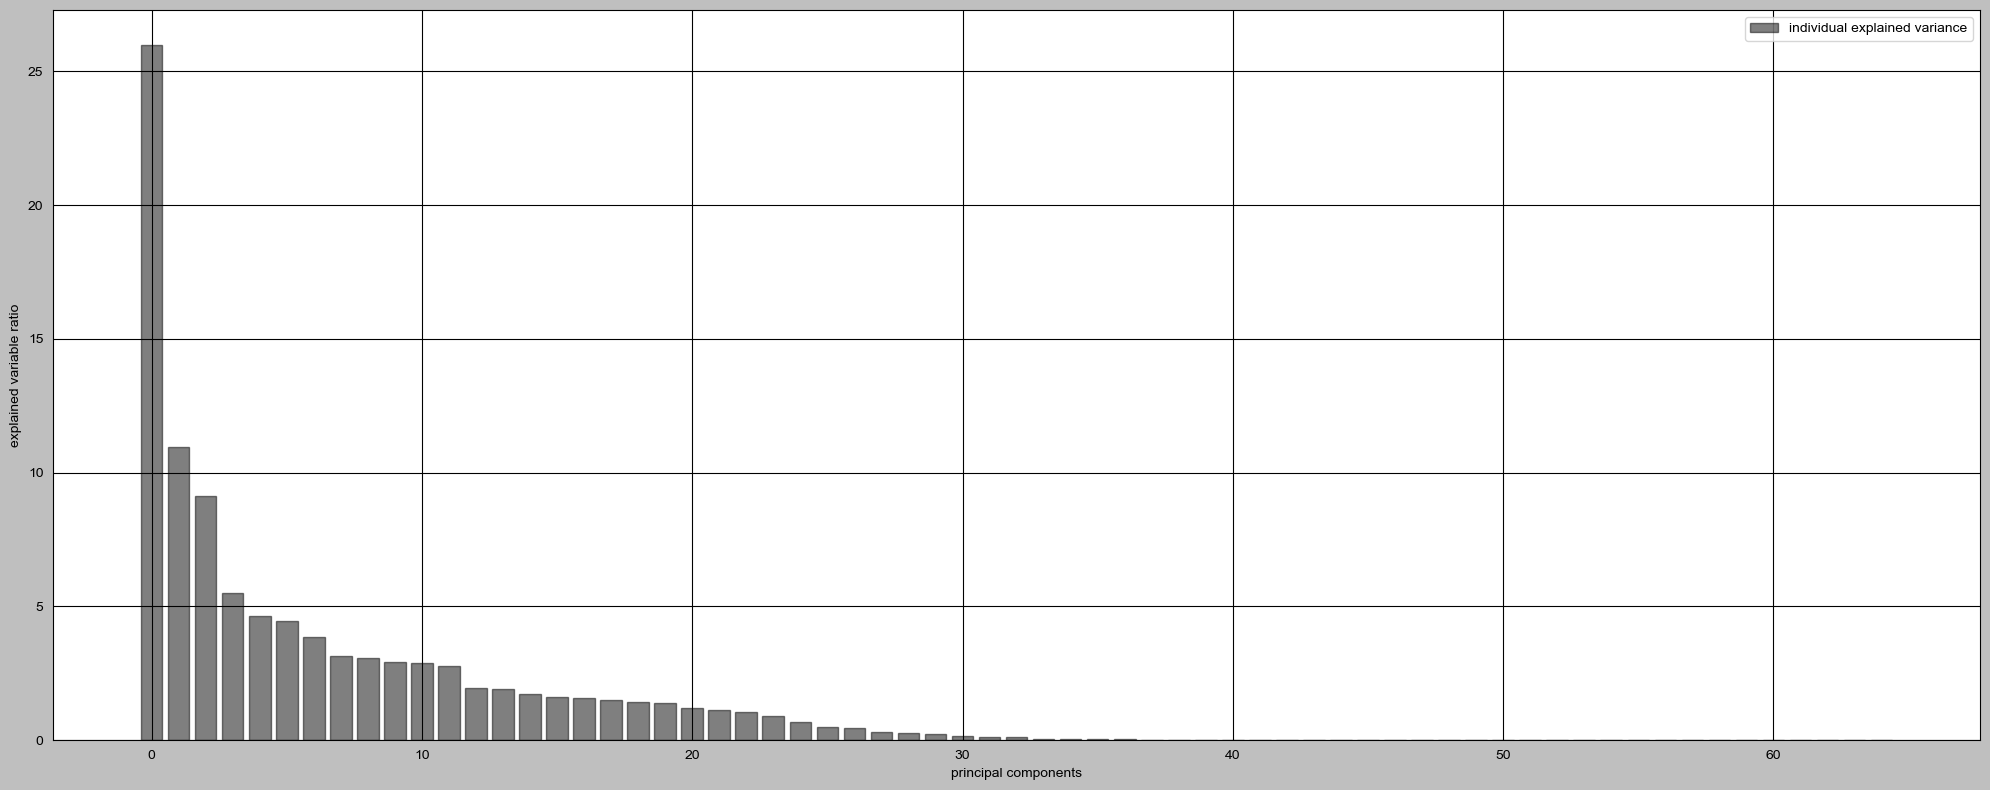

In [34]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_explained_variance.png"
with plt.style.context(style="grayscale"):
    plt.figure(figsize=(20,8))
    plt.bar(x=range(len(X.columns)),height=exp_var,alpha=0.5,align="center",label="individual explained variance")
    plt.legend(loc="best")
    plt.xlabel("principal components")
    plt.ylabel("explained variable ratio")
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

##### Camulative Explained Variance

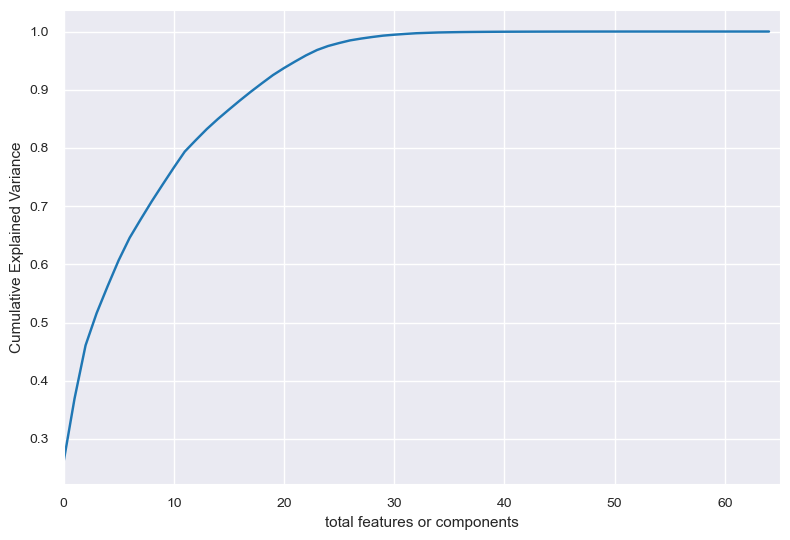

In [35]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_Cumulative_explained_variance.png"

with plt.style.context(style="seaborn-notebook"):
    pca = PCA().fit(X_std) # note: Here to draw the cumulative distribution graph, PCA is fitted into Standardized independent variables
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("total features or components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xlim(0,len(X.columns),1)
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

In [37]:
model = PCA(n_components=0.999999).fit(X_norm)
X_pc = model.transform(X_norm)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X.columns)
# get the names
pca_features = list(set(initial_feature_names[most_important[i]] for i in range(n_pcs)))
print(f"Principal Components: {n_pcs} \nSelected Features: {len(pca_features)}")
pca_features

Principal Components: 53 
Selected Features: 41


['Packet Length Std',
 'Init Fwd Win Bytes',
 'Flow Bytes/s',
 'Subflow Bwd Packets',
 'Avg Packet Size',
 'Bwd IAT Min',
 'Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packet Length Max',
 'ACK Flag Count',
 'Protocol',
 'Flow Packets/s',
 'Idle Min',
 'Flow IAT Min',
 'Bwd Packet Length Std',
 'Idle Max',
 'Bwd Header Length',
 'CWE Flag Count',
 'Active Min',
 'Init Bwd Win Bytes',
 'Packet Length Variance',
 'Flow IAT Std',
 'Down/Up Ratio',
 'Flow IAT Mean',
 'Fwd Seg Size Min',
 'Bwd IAT Max',
 'Fwd Act Data Packets',
 'Bwd IAT Std',
 'Active Max',
 'RST Flag Count',
 'Idle Std',
 'Fwd IAT Std',
 'Fwd Header Length',
 'Packet Length Mean',
 'Fwd IAT Min',
 'Bwd Packets/s',
 'Subflow Fwd Packets',
 'Bwd IAT Mean',
 'Bwd IAT Total',
 'SYN Flag Count',
 'Active Std']

##### But some features did not selected in PCA though we performed hypothesis testing & decided to keep those features. As PCA is unsupervised Learning Technique & itt only looks for the variances impact over dataset, that's why some features like (URG, CWE, FWD Push flags to keep & Fwd IAT total) from T value & Chi-Square Test

In [42]:
features_from_hypothesis_test = ['Flow Duration','Fwd IAT Total','URG Flag Count','CWE Flag Count','RST Flag Count','SYN Flag Count','Protocol','Label']
s1 = set(pca_features)
s2 = set(features_from_hypothesis_test)
final_selected_features = list(s1.union(s2))
print(f"Final Selected Features: {len(final_selected_features)}")
final_selected_features

Final Selected Features: 45


['Packet Length Std',
 'Flow Duration',
 'Label',
 'Init Fwd Win Bytes',
 'Active Std',
 'Flow Bytes/s',
 'Subflow Bwd Packets',
 'Avg Packet Size',
 'Bwd IAT Min',
 'Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packet Length Max',
 'ACK Flag Count',
 'Protocol',
 'Flow Packets/s',
 'Idle Min',
 'Flow IAT Min',
 'Bwd Packet Length Std',
 'Idle Max',
 'Bwd Header Length',
 'CWE Flag Count',
 'Active Min',
 'Init Bwd Win Bytes',
 'Flow IAT Std',
 'Down/Up Ratio',
 'Flow IAT Mean',
 'Fwd Seg Size Min',
 'Bwd IAT Max',
 'Fwd Act Data Packets',
 'Bwd IAT Std',
 'Active Max',
 'RST Flag Count',
 'Idle Std',
 'Fwd IAT Std',
 'Fwd Header Length',
 'Packet Length Mean',
 'Fwd IAT Min',
 'Bwd Packets/s',
 'URG Flag Count',
 'Subflow Fwd Packets',
 'Bwd IAT Mean',
 'Bwd IAT Total',
 'SYN Flag Count',
 'Fwd IAT Total',
 'Packet Length Variance']

<center><h2 style="background:#00FFFF;color:black">
Now need to keep only those final selected features & drop the rest to create model
</h2></center>

In [43]:
# LIST COMPREHENSION HERE AGAIN
length = len(final_selected_features)
dic = {'feature-{}'.format(i): final_selected_features[i] for i in range(length)}

# build the dataframe
selected_features_df = pd.DataFrame(dic.items(),columns=['Features','Names'])
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Selected_Features_along_with_PCA.csv"
selected_features_df.to_csv(filePath)
selected_features_df

Features                   Names
0    feature-0       Packet Length Std
1    feature-1           Flow Duration
2    feature-2                   Label
3    feature-3      Init Fwd Win Bytes
4    feature-4              Active Std
5    feature-5            Flow Bytes/s
6    feature-6     Subflow Bwd Packets
7    feature-7         Avg Packet Size
8    feature-8             Bwd IAT Min
9    feature-9       Packet Length Min
10  feature-10   Fwd Packet Length Std
11  feature-11   Fwd Packet Length Max
12  feature-12          ACK Flag Count
13  feature-13                Protocol
14  feature-14          Flow Packets/s
15  feature-15                Idle Min
16  feature-16            Flow IAT Min
17  feature-17   Bwd Packet Length Std
18  feature-18                Idle Max
19  feature-19       Bwd Header Length
20  feature-20          CWE Flag Count
21  feature-21              Active Min
22  feature-22      Init Bwd Win Bytes
23  feature-23            Flow IAT Std
24  feature-24           Down/Up Ratio
25  feature-25           Flow IAT Mean
26  feature-26        Fwd Seg Size Min
27  feature-27             Bwd IAT Max
28  feature-28    Fwd Act Data Packets
29  feature-29             Bwd IAT Std
30  feature-30              Active Max
31  feature-31          RST Flag Count
32  feature-32                Idle Std
33  feature-33             Fwd IAT Std
34  feature-34       Fwd Header Length
35  feature-35      Packet Length Mean
36  feature-36             Fwd IAT Min
37  feature-37           Bwd Packets/s
38  feature-38          URG Flag Count
39  feature-39     Subflow Fwd Packets
40  feature-40            Bwd IAT Mean
41  feature-41           Bwd IAT Total
42  feature-42          SYN Flag Count
43  feature-43           Fwd IAT Total
44  feature-44  Packet Length Variance

<center><h4 style="background:yellow;color:black">
These Visualization should be done again after umdersampling & oversampling
</center></h4>

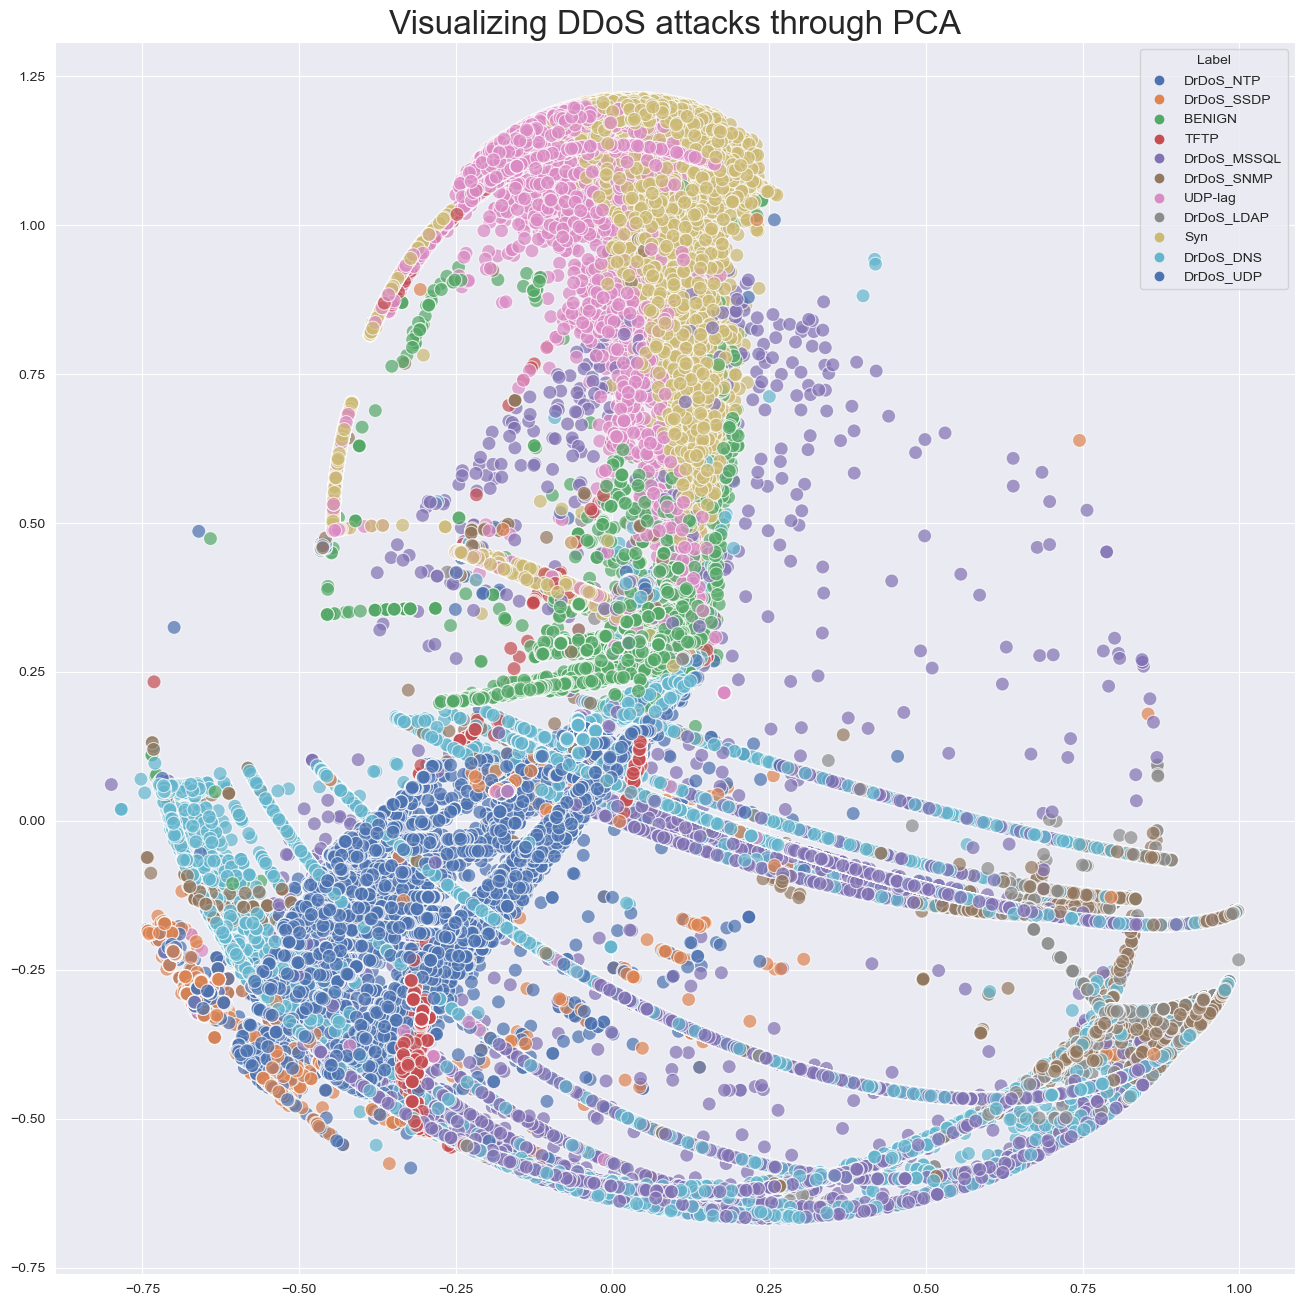

In [40]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_using_PCA.png"
pca = PCA(n_components=0.999999)
principalComponents = pca.fit_transform(X_norm)
# principalComponents
plt.figure(figsize=(16,16))
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:, 1] , s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through PCA', fontsize=24)
plt.savefig(imgPath+imgName)

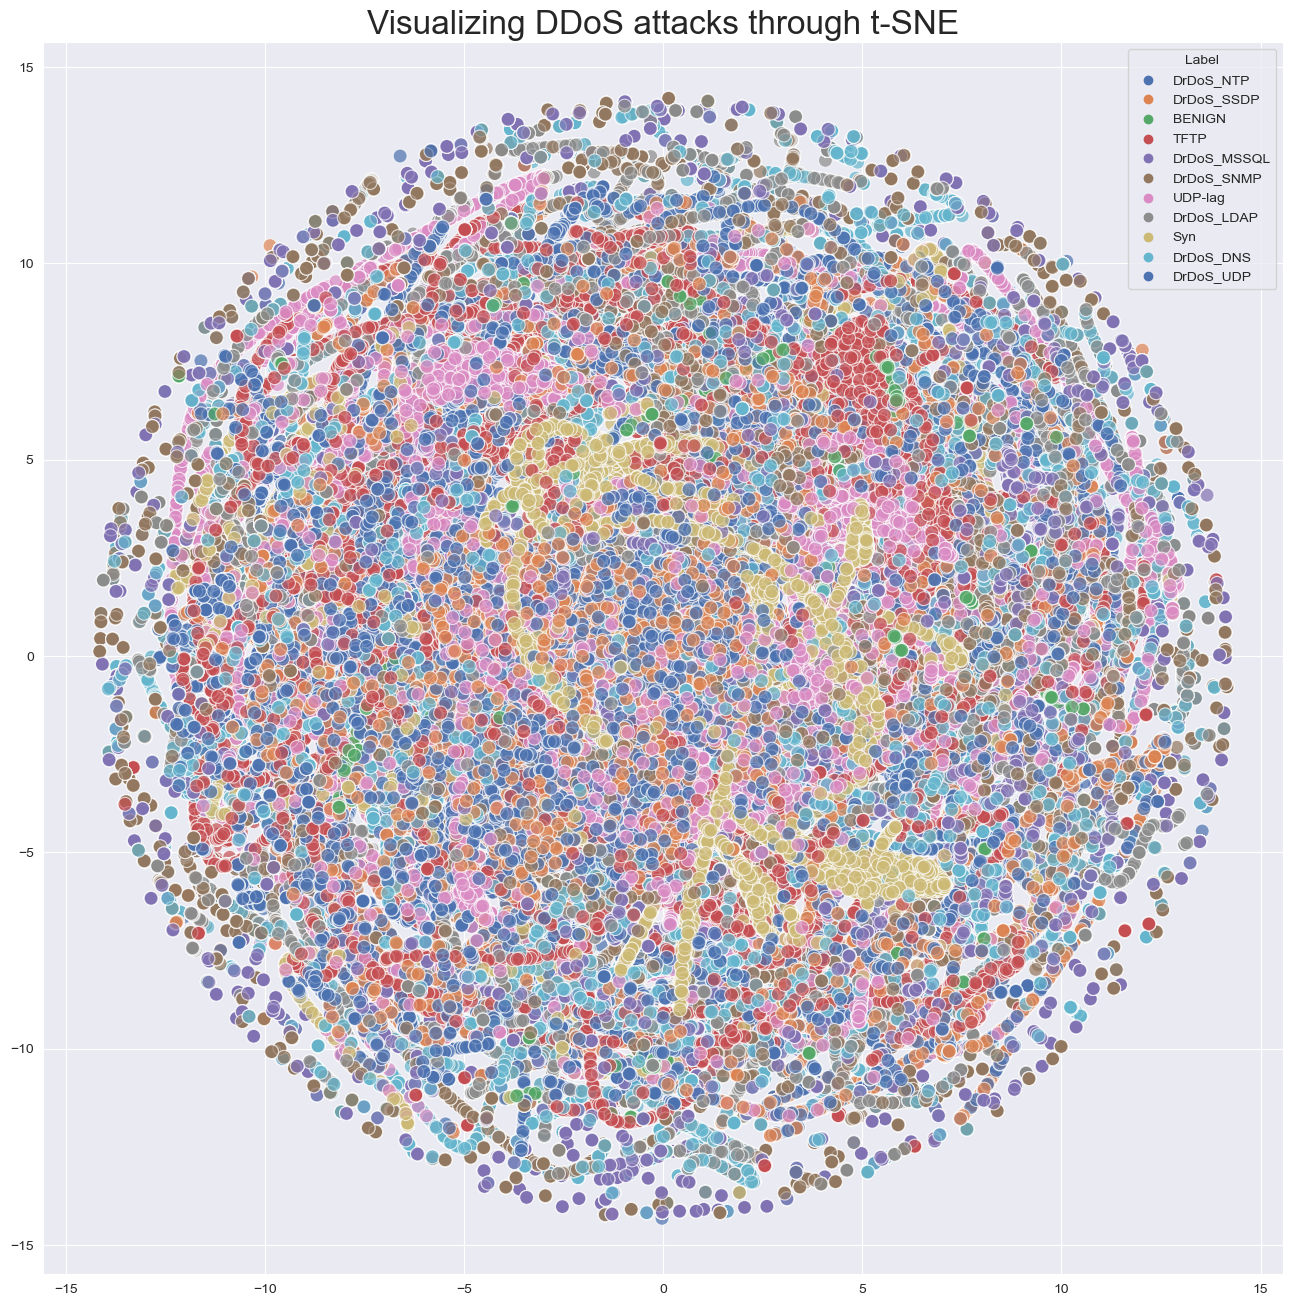

In [41]:
from sklearn.manifold import TSNE

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_using_PCA_tSNE.png"

tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
sns.scatterplot(x=tsne_[:, 0], y=tsne_[:, 1], s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24)
plt.savefig(imgPath+imgName)

##### Clustering couldn't be done due to memory error

In [79]:
from sklearn.cluster import AgglomerativeClustering

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_after_Agglomerate_Clustering.png"
Agglo = AgglomerativeClustering(n_clusters=11)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,16))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(11))
plt.title('Visualizing DDoS attacks after Agglomerate Clustering', fontsize=24);
plt.show()
plt.savefig(imgPath+imgName)

MemoryError: Unable to allocate 623. GiB for an array with shape (83640295500,) and data type float64